In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cape town za
atuona pf
coquimbo cl
tigzirt dz
punta arenas cl
new norfolk au
bluff nz
port alfred za
bethel us
robertsport lr
kodiak us
nanortalik gl
borsa ro
flinders au
lolua tv
nanortalik gl
georgetown sh
puerto ayora ec
albany au
lebu cl
vaini to
constitucion mx
dali cn
shimoda jp
flinders au
chokurdakh ru
kodiak us
adrar dz
jamestown sh
empalme mx
qaanaaq gl
coquimbo cl
galiwinku au
bluff nz
pisco pe
vanimo pg
chokurdakh ru
rikitea pf
rikitea pf
tilichiki ru
rikitea pf
puerto ayora ec
margate za
punta arenas cl
saskylakh ru
ushuaia ar
vienenburg de
katikati nz
miri my
ushuaia ar
arraial do cabo br
busselton au
attawapiskat ca
esperance au
saleaula ws
norman wells ca
salta ar
maceio br
kaitangata nz
kaitangata nz
sambava mg
jiuquan cn
new norfolk au
podor sn
jamestown sh
sentyabrskiy ru
thompson ca
butaritari ki
ilulissat gl
caravelas br
vaini to
atuona pf
yellowknife ca
tecoanapa mx
nome us
bengkulu id
baghdad iq
pokrovsk-uralskiy ru
thompson ca
nizhneyansk ru
mrirt ma
hobart au
b

ushuaia ar
tsihombe mg
lagoa pt
bluff nz
nizhneyansk ru
hay river ca
rikitea pf
coihaique cl
ribeira grande pt
meulaboh id
kodiak us
ostrovnoy ru
khatanga ru
tuktoyaktuk ca
morgan city us
albany au
ushuaia ar
coquimbo cl
necochea ar
illapel cl
kupino ru
narsaq gl
cape town za
avarua ck
pierre us
busselton au
albany au
qinhuangdao cn
alofi nu
punta arenas cl
nagato jp
albany au
ca mau vn
khatanga ru
partizan ru
orlovskiy ru
saskylakh ru
olga ru
damietta eg
busselton au
atuona pf
cape town za
marawi sd
nikolskoye ru
ushuaia ar
iquitos pe
bella union uy
airai pw
yellowknife ca
georgetown sh
cape town za
caravelas br
zhangye cn
dingle ie
qaanaaq gl
monrovia lr
torbay ca
cape town za
port hardy ca
ahtopol bg
ushuaia ar
geraldton au
plerin fr
dingle ie
college us
mutis co
qaanaaq gl
victoria sc
tsihombe mg
shatsk ru
bonavista ca
taolanaro mg
cayenne gf
mataura pf
grand gaube mu
nanga eboko cm
pevek ru
saldanha za
lakselv no
mys shmidta ru
chokurdakh ru
parrita cr
rikitea pf
mikhaylovka kz
dh

tornio fi
tarakan id
ilulissat gl
berlevag no
ushuaia ar
sault sainte marie ca
khatanga ru
san jose bo
havoysund no
puerto ayora ec
san cristobal ec
rikitea pf
banda aceh id
kapaa us
rikitea pf
souillac mu
iqaluit ca
clyde river ca
zeya ru
saint-philippe re
east london za
rikitea pf
mayo ca
rikitea pf
severo-kurilsk ru
huanren cn
myitkyina mm
boa vista br
sentyabrskiy ru
tsihombe mg
ahuimanu us
vaini to
sorland no
ponta do sol cv
challans fr
stara vyzhivka ua
olafsvik is
innisfail au
hermanus za
filingue ne
tiksi ru
mackay au
kahului us
ostrovnoy ru
kapaa us
mayo ca
taolanaro mg
ushuaia ar
rosignano marittimo it
yellowknife ca
avarua ck
barrow us


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | cape town
Processing Record 2 of Set 12 | atuona
Processing Record 3 of Set 12 | coquimbo
Processing Record 4 of Set 12 | tigzirt
Processing Record 5 of Set 12 | punta arenas
Processing Record 6 of Set 12 | new norfolk
Processing Record 7 of Set 12 | bluff
Processing Record 8 of Set 12 | port alfred
Processing Record 9 of Set 12 | bethel
Processing Record 10 of Set 12 | robertsport
Processing Record 11 of Set 12 | kodiak
Processing Record 12 of Set 12 | nanortalik
Processing Record 13 of Set 12 | borsa
Processing Record 14 of Set 12 | flinders
Processing Record 15 of Set 12 | lolua
City not found. Skipping...
Processing Record 16 of Set 12 | georgetown
Processing Record 17 of Set 12 | puerto ayora
Processing Record 18 of Set 12 | albany
Processing Record 19 of Set 12 | lebu
Processing Record 20 of Set 12 | vaini
Processing Record 21 of Set 12 | constitucion
Processing Record 22 of Set 12 | dali


City not found. Skipping...
Processing Record 35 of Set 15 | hambantota
Processing Record 36 of Set 15 | egvekinot
Processing Record 37 of Set 15 | manokwari
Processing Record 38 of Set 15 | matara
Processing Record 39 of Set 15 | popondetta
Processing Record 40 of Set 15 | yaya
Processing Record 41 of Set 15 | awbari
Processing Record 42 of Set 15 | kharovsk
Processing Record 43 of Set 15 | tual
Processing Record 44 of Set 15 | miraflores
Processing Record 45 of Set 15 | port elizabeth
Processing Record 46 of Set 15 | erice
Processing Record 47 of Set 15 | madimba
Processing Record 48 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 49 of Set 15 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 15 | sarakhs
Processing Record 1 of Set 16 | beja
Processing Record 2 of Set 16 | yerkoy
Processing Record 3 of Set 16 | orocue
Processing Record 4 of Set 16 | ancud
Processing Record 5 of Set 16 | dzilam gonzalez
Processing Record 6 of Set 16 | nioro
Proc

Processing Record 20 of Set 19 | mutis
Processing Record 21 of Set 19 | shatsk
Processing Record 22 of Set 19 | bonavista
Processing Record 23 of Set 19 | cayenne
Processing Record 24 of Set 19 | grand gaube
Processing Record 25 of Set 19 | nanga eboko
Processing Record 26 of Set 19 | pevek
Processing Record 27 of Set 19 | saldanha
Processing Record 28 of Set 19 | lakselv
Processing Record 29 of Set 19 | mys shmidta
City not found. Skipping...
Processing Record 30 of Set 19 | parrita
Processing Record 31 of Set 19 | mikhaylovka
Processing Record 32 of Set 19 | dhilwan
Processing Record 33 of Set 19 | korla
Processing Record 34 of Set 19 | cap malheureux
Processing Record 35 of Set 19 | grand-santi
Processing Record 36 of Set 19 | shamkhal
Processing Record 37 of Set 19 | veraval
Processing Record 38 of Set 19 | whyalla
Processing Record 39 of Set 19 | harper
Processing Record 40 of Set 19 | ushtobe
Processing Record 41 of Set 19 | samarai
Processing Record 42 of Set 19 | fairbanks
Proc

Processing Record 4 of Set 23 | bundaberg
Processing Record 5 of Set 23 | beyneu
Processing Record 6 of Set 23 | pringsewu
Processing Record 7 of Set 23 | mocuba
Processing Record 8 of Set 23 | sangar
Processing Record 9 of Set 23 | penzance
Processing Record 10 of Set 23 | santa ana
Processing Record 11 of Set 23 | samoded
Processing Record 12 of Set 23 | ishim
Processing Record 13 of Set 23 | kedrovyy
Processing Record 14 of Set 23 | la spezia
Processing Record 15 of Set 23 | mayumba
Processing Record 16 of Set 23 | bambanglipuro
Processing Record 17 of Set 23 | lakhdenpokhya
Processing Record 18 of Set 23 | vao
Processing Record 19 of Set 23 | dauphin
Processing Record 20 of Set 23 | half moon bay
Processing Record 21 of Set 23 | mount gambier
Processing Record 22 of Set 23 | carman
Processing Record 23 of Set 23 | tazmalt
Processing Record 24 of Set 23 | sao filipe
Processing Record 25 of Set 23 | kovur
Processing Record 26 of Set 23 | kulunda
Processing Record 27 of Set 23 | zhezk

In [9]:
len(city_data)

551

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,69.01,63,0,5.75,ZA,2021-04-17 17:54:49
1,Atuona,-9.8000,-139.0333,80.46,74,70,17.69,PF,2021-04-17 17:54:50
2,Coquimbo,-29.9533,-71.3436,62.60,72,40,11.50,CL,2021-04-17 17:54:50
3,Tigzirt,36.8886,4.1198,54.05,59,38,2.39,DZ,2021-04-17 17:54:51
4,Punta Arenas,-53.1500,-70.9167,53.60,58,75,10.36,CL,2021-04-17 17:54:51
5,New Norfolk,-42.7826,147.0587,55.00,79,96,3.00,AU,2021-04-17 17:54:51
6,Bluff,-46.6000,168.3333,50.00,89,90,23.26,NZ,2021-04-17 17:54:52
7,Port Alfred,-33.5906,26.8910,68.43,66,43,19.57,ZA,2021-04-17 17:54:52
8,Bethel,41.3712,-73.4140,52.00,50,75,6.91,US,2021-04-17 17:50:01
9,Robertsport,6.7533,-11.3686,80.89,76,100,3.27,LR,2021-04-17 17:54:53


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-04-17 17:54:49,-33.9258,18.4232,69.01,63,0,5.75
1,Atuona,PF,2021-04-17 17:54:50,-9.8000,-139.0333,80.46,74,70,17.69
2,Coquimbo,CL,2021-04-17 17:54:50,-29.9533,-71.3436,62.60,72,40,11.50
3,Tigzirt,DZ,2021-04-17 17:54:51,36.8886,4.1198,54.05,59,38,2.39
4,Punta Arenas,CL,2021-04-17 17:54:51,-53.1500,-70.9167,53.60,58,75,10.36
...,...,...,...,...,...,...,...,...,...
546,Challans,FR,2021-04-17 17:54:20,46.8436,-1.8749,55.40,47,0,8.05
547,Stara Vyzhivka,UA,2021-04-17 17:58:44,51.4376,24.4400,42.37,92,99,4.83
548,Innisfail,AU,2021-04-17 17:58:45,-17.5333,146.0333,73.26,78,93,5.26
549,Filingue,NE,2021-04-17 17:58:45,14.3521,3.3168,95.83,14,47,4.09


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

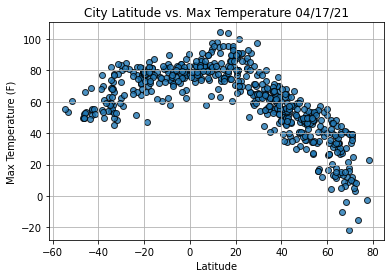

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

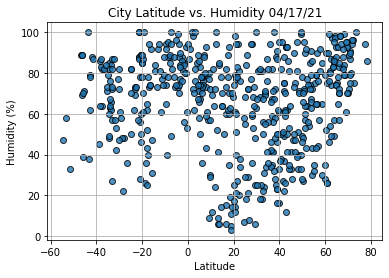

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

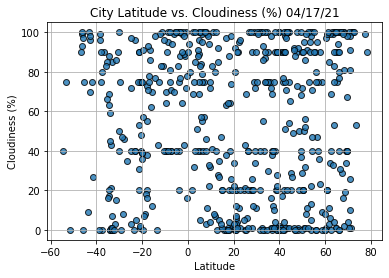

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

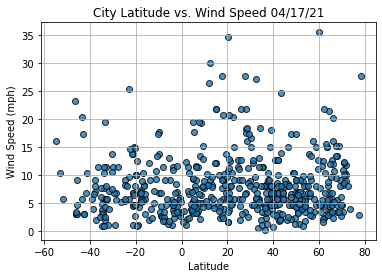

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                     Flinders
Country                        AU
Date          2021-04-17 17:54:54
Lat                      -34.5833
Lng                       150.855
Max Temp                       54
Humidity                       85
Cloudiness                     69
Wind Speed                   1.01
Name: 13, dtype: object

In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

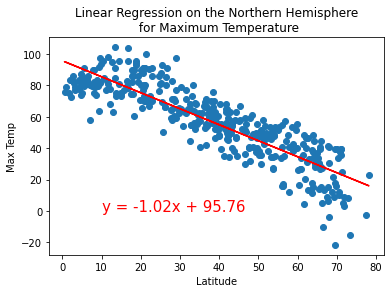

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,0))

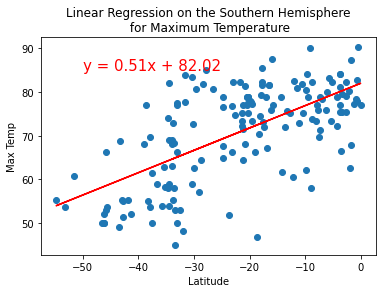

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,85))

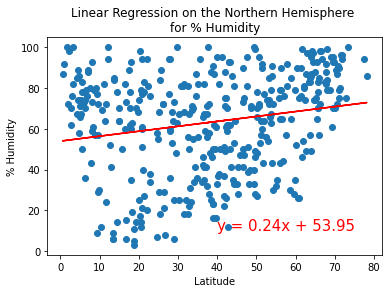

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

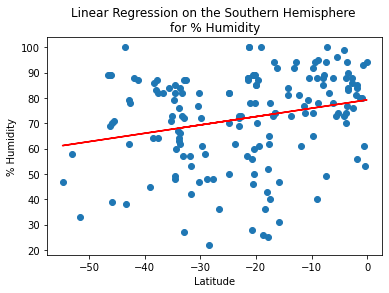

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

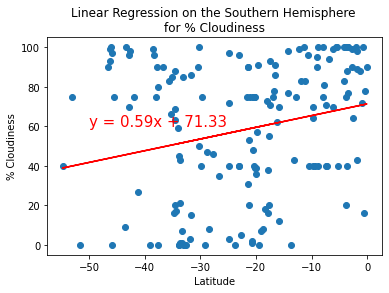

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

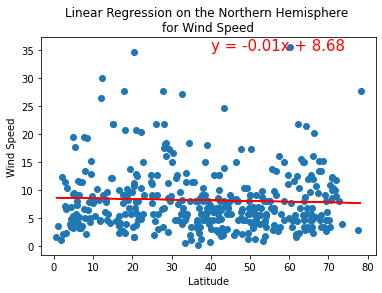

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

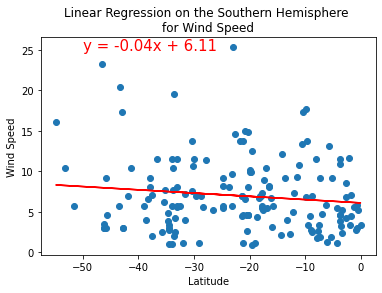

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))